In [2]:
#realizamos las importaciones necesarias para ejecutar el código
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fase 1: Exploración y Limpieza
## 1. Exploración Inicial:
- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas
relevantes.
- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de
las columnas involucradas.
- Une los dos conjuntos de datos de la forma más eficiente.

## 2. Limpieza de Datos:
- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los
datos para el análisis estadístico.

In [99]:
def read(ruta_archivo):
    return pd.read_csv(ruta_archivo)

In [100]:
df_activity = read('files/Customer Flight Activity.csv')
df_loyalty = read('files/Customer Loyalty History.csv')

In [101]:
df_activity.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [102]:
df_activity.head(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [103]:
df_loyalty.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [104]:
df_loyalty.head(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [106]:
def eda (dataframe):
    """
    Realiza un análisis exploratorio básico de un DataFrame, mostrando información sobre duplicados,
    valores nulos, tipos de datos, valores únicos para columnas categóricas y estadísticas descriptivas
    para columnas categóricas y numéricas, agrupadas por la columna de control.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que se va a explorar.

    Returns: 
    No devuelve nada directamente, pero imprime en la consola la información exploratoria.
    """
    
    print(f"El tamaño del dataframe es: {dataframe.shape}")
    print("\n ..................... \n")

    print(f"Los duplicados que tenemos en el conjunto de datos son: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    
    
    # generamos un DataFrame para los valores nulos
    print("Los nulos que tenemos en el conjunto de datos son:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    
    print("\n ..................... \n")
    print(f"Los tipos de las columnas son:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))
    
    
    print("\n ..................... \n")
    print("Los valores que tenemos para las columnas categóricas son: ")
    dataframe_categoricas = dataframe.select_dtypes(include = "O")
    
    for col in dataframe_categoricas.columns:
        print(f"La columna {col.upper()} tiene las siguientes valores únicos:")
        display(pd.DataFrame(dataframe[col].value_counts()).head())    
    
    
    print("\n ..................... \n")
    print("Los valores que tenemos para las columnas numéricas son: ")
    dataframe_numericas = dataframe.select_dtypes(include='number')
    
    for col in dataframe_numericas.columns:
        print(f"La columna {col.upper()} tiene las siguientes valores únicos:")
        display(pd.DataFrame(dataframe[col].value_counts()).head())    

    print("\n ..................... \n")
    descripcion = dataframe.describe().T
    print(f"Los principales valores estadísticos son:")
    print(descripcion.to_string())

In [107]:
eda(df_activity)

El tamaño del dataframe es: (405624, 10)

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 1864

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Loyalty Number,int64
Year,int64
Month,int64
Flights Booked,int64
Flights with Companions,int64
Total Flights,int64
Distance,int64
Points Accumulated,float64
Points Redeemed,int64
Dollar Cost Points Redeemed,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 

 ..................... 

Los valores que tenemos para las columnas numéricas son: 
La columna LOYALTY NUMBER tiene las siguientes valores únicos:


,count
Loyalty Number,
678205,72
989528,48
373638,48
684889,48
684881,48


La columna YEAR tiene las siguientes valores únicos:


,count
Year,
2017,202812
2018,202812


La columna MONTH tiene las siguientes valores únicos:


,count
Month,
1,33802
9,33802
2,33802
3,33802
11,33802


La columna FLIGHTS BOOKED tiene las siguientes valores únicos:


,count
Flights Booked,
0,197992
3,18228
11,15705
5,15084
7,14561


La columna FLIGHTS WITH COMPANIONS tiene las siguientes valores únicos:


,count
Flights with Companions,
0,296887
2,19272
3,19015
1,17905
4,13665


La columna TOTAL FLIGHTS tiene las siguientes valores únicos:


,count
Total Flights,
0,197992
6,15273
10,14393
8,14056
4,13656


La columna DISTANCE tiene las siguientes valores únicos:


,count
Distance,
0,197992
2520,410
2880,401
1680,389
2160,365


La columna POINTS ACCUMULATED tiene las siguientes valores únicos:


,count
Points Accumulated,
0.0,197992
180.0,763
270.0,734
288.0,717
189.0,709


La columna POINTS REDEEMED tiene las siguientes valores únicos:


,count
Points Redeemed,
0,381443
447,103
523,100
443,98
516,97


La columna DOLLAR COST POINTS REDEEMED tiene las siguientes valores únicos:


,count
Dollar Cost Points Redeemed,
0,381443
36,1037
38,1001
40,993
42,983



 ..................... 

Los principales valores estadísticos son:
                                count           mean            std       min        25%       50%        75%       max
Loyalty Number               405624.0  550037.873084  258935.286969  100018.0  326961.00  550834.0  772194.00  999986.0
Year                         405624.0    2017.500000       0.500001    2017.0    2017.00    2017.5    2018.00    2018.0
Month                        405624.0       6.500000       3.452057       1.0       3.75       6.5       9.25      12.0
Flights Booked               405624.0       4.115052       5.225518       0.0       0.00       1.0       8.00      21.0
Flights with Companions      405624.0       1.031805       2.076869       0.0       0.00       0.0       1.00      11.0
Total Flights                405624.0       5.146858       6.521227       0.0       0.00       1.0      10.00      32.0
Distance                     405624.0    1208.880059    1433.155320       0.0       0.00    

In [108]:
# hemos encontrado 1864 registros completamente duplicados y hemos decidido eliminarlos porque parece ser un error ya que no aportan ningún dato nuevo ni cambio en los registros:
df_activity.drop_duplicates(inplace = True)

In [109]:
df_activity.duplicated().sum()

0

In [110]:
df_activity.shape

(403760, 10)

In [111]:
def modify_columns(dataframe):
    """
    Cambia los nombres de las columnas del DataFrame a minúsculas y reemplaza los espacios por barras bajas.

    Parámetros:
    dataframe: el dataframe al que modificaremos las columnas
    Returns:
    El dataframe con los nombres de las columnas modificados.
    """

    nombres_columnas = dataframe.columns
    nuevos_nombres = [nombre.lower().strip().replace(' ', '_') for nombre in nombres_columnas]
    dataframe.columns = nuevos_nombres
    
    return dataframe

In [ ]:
#limpiamos los nombres de las columnas quitando sustituyendo espacios por _ y poniéndolos en minúscula

In [112]:
df_activity = modify_columns(df_activity)

In [113]:
df_activity.head(5)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [114]:
#guardamos el dataframe limpio
df_activity.to_csv('files/Customer Flight Activity Clean.csv')

In [115]:
eda(df_loyalty)

El tamaño del dataframe es: (16737, 16)

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
Salary,25.321145
Cancellation Year,87.650117
Cancellation Month,87.650117



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Loyalty Number,int64
Country,object
Province,object
City,object
Postal Code,object
Gender,object
Education,object
Salary,float64
Marital Status,object
Loyalty Card,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna COUNTRY tiene las siguientes valores únicos:


,count
Country,
Canada,16737


La columna PROVINCE tiene las siguientes valores únicos:


,count
Province,
Ontario,5404
British Columbia,4409
Quebec,3300
Alberta,969
Manitoba,658


La columna CITY tiene las siguientes valores únicos:


,count
City,
Toronto,3351
Vancouver,2582
Montreal,2059
Winnipeg,658
Whistler,582


La columna POSTAL CODE tiene las siguientes valores únicos:


,count
Postal Code,
V6E 3D9,911
V5R 1W3,684
V6T 1Y8,582
V6E 3Z3,544
M2M 7K8,534


La columna GENDER tiene las siguientes valores únicos:


,count
Gender,
Female,8410
Male,8327


La columna EDUCATION tiene las siguientes valores únicos:


,count
Education,
Bachelor,10475
College,4238
High School or Below,782
Doctor,734
Master,508


La columna MARITAL STATUS tiene las siguientes valores únicos:


,count
Marital Status,
Married,9735
Single,4484
Divorced,2518


La columna LOYALTY CARD tiene las siguientes valores únicos:


,count
Loyalty Card,
Star,7637
Nova,5671
Aurora,3429


La columna ENROLLMENT TYPE tiene las siguientes valores únicos:


,count
Enrollment Type,
Standard,15766
2018 Promotion,971



 ..................... 

Los valores que tenemos para las columnas numéricas son: 
La columna LOYALTY NUMBER tiene las siguientes valores únicos:


,count
Loyalty Number,
480934,1
208485,1
455896,1
469781,1
533488,1


La columna SALARY tiene las siguientes valores únicos:


,count
Salary,
101933.0,23
62283.0,14
61809.0,14
51573.0,14
64001.0,13


La columna CLV tiene las siguientes valores únicos:


,count
CLV,
8564.77,13
13024.13,12
3808.12,12
2359.42,12
3731.50,12


La columna ENROLLMENT YEAR tiene las siguientes valores únicos:


,count
Enrollment Year,
2018,3010
2017,2487
2016,2456
2013,2397
2014,2370


La columna ENROLLMENT MONTH tiene las siguientes valores únicos:


,count
Enrollment Month,
5,1503
12,1480
7,1473
11,1446
10,1444


La columna CANCELLATION YEAR tiene las siguientes valores únicos:


,count
Cancellation Year,
2018.0,645
2017.0,506
2016.0,427
2015.0,265
2014.0,181


La columna CANCELLATION MONTH tiene las siguientes valores únicos:


,count
Cancellation Month,
12.0,213
11.0,212
8.0,208
7.0,186
10.0,180



 ..................... 

Los principales valores estadísticos son:
                      count           mean            std        min        25%        50%        75%        max
Loyalty Number      16737.0  549735.880445  258912.132453  100018.00  326603.00  550434.00  772019.00  999986.00
Salary              12499.0   79245.609409   35008.297285  -58486.00   59246.50   73455.00   88517.50  407228.00
CLV                 16737.0    7988.896536    6860.982280    1898.01    3980.84    5780.18    8940.58   83325.38
Enrollment Year     16737.0    2015.253211       1.979111    2012.00    2014.00    2015.00    2017.00    2018.00
Enrollment Month    16737.0       6.669116       3.398958       1.00       4.00       7.00      10.00      12.00
Cancellation Year    2067.0    2016.503145       1.380743    2013.00    2016.00    2017.00    2018.00    2018.00
Cancellation Month   2067.0       6.962748       3.455297       1.00       4.00       7.00      10.00      12.00


In [116]:
df_loyalty.head(1)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN


In [ ]:
#las columnas 'cancellation year' y 'cancellation month' tienen muchísimos nulos (87.65%) pero hemos decidido mantenerlos como están ya que entendemos que solo tienen dato los clientes que han cancelado sus cuentas con la compañía y este es un dato importante.

In [117]:
#eliminamos la columna 'country' ya que no aporta ningún dato teniendo en cuenta que todos los clientes son de Canadá
df_loyalty.drop(columns = 'Country', inplace = True)

In [118]:
# Vamos a modificar los valores de gender pasando female a F y male a M para evitar errores de escritura a futuro
df_loyalty['Gender'] = df_loyalty['Gender'].map({'Female': "F", 'Male': 'M'})


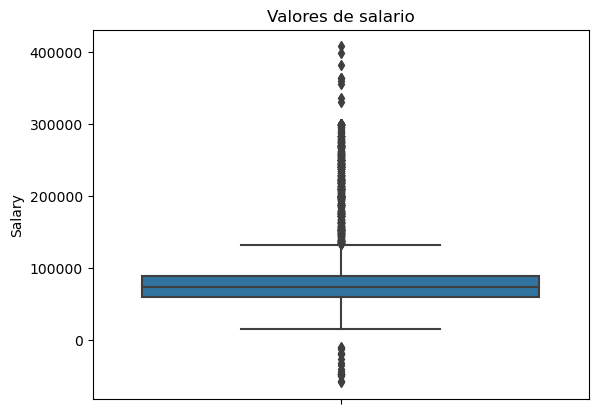

In [119]:
# la columna salary tiene muchos nulos (25,32%) y aunque ahora no vayamos a imputarlos para no crear valores "falsos", haremos un pequeño análisis para dejar documentado cómo actuar si es necesario imputarlos a futuro para operaciones estadísticas:
sns.boxplot(y ='Salary', data = df_loyalty)
plt.title('Valores de salario');


In [ ]:
#Hay muchísimos valores atípicos por lo que, en caso de necesitar imputar nulos, lo correcto será usar la mediana.

In [120]:
#limpiamos los nombres de las columnas quitando sustituyendo espacios por _ y poniéndolos en minúscula
df_loyalty = modify_columns(df_loyalty)

In [121]:
df_loyalty.columns

Index(['loyalty_number', 'province', 'city', 'postal_code', 'gender',
       'education', 'salary', 'marital_status', 'loyalty_card', 'clv',
       'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month'],
      dtype='object')

In [122]:
#guardamos el dataframe limpio
df_loyalty.to_csv('files/Customer Loyalty History Clean.csv')

In [ ]:
#unificamos la dos tablas en una para poder tener todos los datos unidos

In [123]:
df_activity.head(3)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0


In [124]:
df_activity.shape

(403760, 10)

In [125]:
df_loyalty.shape

(16737, 15)

In [126]:
df_completo = pd.merge(df_activity, df_loyalty, on='loyalty_number', how='left')

In [127]:
df_completo

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,...,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0,...,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
403756,999911,2018,12,0,0,0,0,0.0,0,0,...,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
403757,999940,2018,12,3,0,3,1233,123.0,0,0,...,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
403758,999982,2018,12,0,0,0,0,0.0,0,0,...,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN


In [128]:
#vuelvo a analizar la tabla completa para detectar errores
eda(df_completo)

El tamaño del dataframe es: (403760, 24)

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
salary,25.326927
cancellation_year,87.703091
cancellation_month,87.703091



 ..................... 

Los tipos de las columnas son:


,tipo_dato
loyalty_number,int64
year,int64
month,int64
flights_booked,int64
flights_with_companions,int64
total_flights,int64
distance,int64
points_accumulated,float64
points_redeemed,int64
dollar_cost_points_redeemed,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna PROVINCE tiene las siguientes valores únicos:


,count
province,
Ontario,130258
British Columbia,106442
Quebec,79573
Alberta,23360
Manitoba,15900


La columna CITY tiene las siguientes valores únicos:


,count
city,
Toronto,80775
Vancouver,62314
Montreal,49687
Winnipeg,15900
Whistler,13994


La columna POSTAL_CODE tiene las siguientes valores únicos:


,count
postal_code,
V6E 3D9,21944
V5R 1W3,16529
V6T 1Y8,13994
V6E 3Z3,13128
M2M 7K8,12855


La columna GENDER tiene las siguientes valores únicos:


,count
gender,
F,202757
M,201003


La columna EDUCATION tiene las siguientes valores únicos:


,count
education,
Bachelor,252567
College,102260
High School or Below,18915
Doctor,17731
Master,12287


La columna MARITAL_STATUS tiene las siguientes valores únicos:


,count
marital_status,
Married,234845
Single,108153
Divorced,60762


La columna LOYALTY_CARD tiene las siguientes valores únicos:


,count
loyalty_card,
Star,183745
Nova,136883
Aurora,83132


La columna ENROLLMENT_TYPE tiene las siguientes valores únicos:


,count
enrollment_type,
Standard,380419
2018 Promotion,23341



 ..................... 

Los valores que tenemos para las columnas numéricas son: 
La columna LOYALTY_NUMBER tiene las siguientes valores únicos:


,count
loyalty_number,
974875,48
736504,48
890702,48
617489,48
200519,47


La columna YEAR tiene las siguientes valores únicos:


,count
year,
2018,202022
2017,201738


La columna MONTH tiene las siguientes valores únicos:


,count
month,
11,33663
10,33662
12,33662
9,33659
8,33655


La columna FLIGHTS_BOOKED tiene las siguientes valores únicos:


,count
flights_booked,
0,196128
3,18228
11,15705
5,15084
7,14561


La columna FLIGHTS_WITH_COMPANIONS tiene las siguientes valores únicos:


,count
flights_with_companions,
0,295023
2,19272
3,19015
1,17905
4,13665


La columna TOTAL_FLIGHTS tiene las siguientes valores únicos:


,count
total_flights,
0,196128
6,15273
10,14393
8,14056
4,13656


La columna DISTANCE tiene las siguientes valores únicos:


,count
distance,
0,196128
2520,410
2880,401
1680,389
2160,365


La columna POINTS_ACCUMULATED tiene las siguientes valores únicos:


,count
points_accumulated,
0.0,196128
180.0,763
270.0,734
288.0,717
189.0,709


La columna POINTS_REDEEMED tiene las siguientes valores únicos:


,count
points_redeemed,
0,379579
447,103
523,100
443,98
516,97


La columna DOLLAR_COST_POINTS_REDEEMED tiene las siguientes valores únicos:


,count
dollar_cost_points_redeemed,
0,379579
36,1037
38,1001
40,993
42,983


La columna SALARY tiene las siguientes valores únicos:


,count
salary,
101933.0,552
62283.0,336
61809.0,336
51573.0,336
64001.0,312


La columna CLV tiene las siguientes valores únicos:


,count
clv,
8564.77,312
14024.36,311
4330.39,309
3873.65,308
25464.82,305


La columna ENROLLMENT_YEAR tiene las siguientes valores únicos:


,count
enrollment_year,
2018,72401
2017,60038
2016,59294
2013,57796
2014,57067


La columna ENROLLMENT_MONTH tiene las siguientes valores únicos:


,count
enrollment_month,
5,36314
12,35635
7,35544
11,34867
10,34817


La columna CANCELLATION_YEAR tiene las siguientes valores únicos:


,count
cancellation_year,
2018.0,15519
2017.0,12147
2016.0,10248
2015.0,6360
2014.0,4344


La columna CANCELLATION_MONTH tiene las siguientes valores únicos:


,count
cancellation_month,
12.0,5112
11.0,5095
8.0,4992
7.0,4480
10.0,4322



 ..................... 

Los principales valores estadísticos son:
                                count           mean            std        min        25%        50%        75%        max
loyalty_number               403760.0  549875.383713  258961.514684  100018.00  326699.00  550598.00  772152.00  999986.00
year                         403760.0    2017.500352       0.500000    2017.00    2017.00    2018.00    2018.00    2018.00
month                        403760.0       6.501335       3.451982       1.00       4.00       7.00      10.00      12.00
flights_booked               403760.0       4.134050       5.230064       0.00       0.00       1.00       8.00      21.00
flights_with_companions      403760.0       1.036569       2.080472       0.00       0.00       0.00       1.00      11.00
total_flights                403760.0       5.170619       6.526858       0.00       0.00       1.00      10.00      32.00
distance                     403760.0    1214.460979    1434.098521    

In [140]:
#analizo los duplicados de loyalty_number
df_completo[df_completo.duplicated(subset=['loyalty_number'], keep=False)]

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,...,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0,...,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
403756,999911,2018,12,0,0,0,0,0.0,0,0,...,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
403757,999940,2018,12,3,0,3,1233,123.0,0,0,...,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
403758,999982,2018,12,0,0,0,0,0.0,0,0,...,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN


In [141]:
df_completo[df_completo['loyalty_number'] == 100018]

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,...,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
16782,100018,2017,2,2,2,4,1320,132.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
46078,100018,2018,10,6,4,10,3110,311.0,385,31,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
50390,100018,2017,4,4,0,4,924,92.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
67197,100018,2017,5,0,0,0,0,0.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
84017,100018,2017,6,4,1,5,4330,433.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
100838,100018,2017,7,10,0,10,3870,387.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
134481,100018,2017,9,9,4,13,1651,165.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
142015,100018,2017,8,10,5,15,4200,420.0,690,56,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
151303,100018,2017,10,6,0,6,1032,103.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [ ]:
#no hay problema con los duplicados de loyalty number ya que se registra la actividad de diferentes meses 

In [143]:
df_completo.to_csv('files/Customer Activity and Loyalty Details.csv')

# Fase 2: Visualización
Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:
## 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?


In [144]:
df_completo['year'].value_counts()

year
2018    202022
2017    201738
Name: count, dtype: int64

In [ ]:
#creo dos tablas, una para cada año de los que tenemos datos y sumo todos los vuelos reservados cada mes del año

In [156]:
df_2017 = df_completo[df_completo['year'] == 2017][['month', 'flights_booked']]

In [157]:
df_2017 = df_2017.groupby('month')['flights_booked'].sum().reset_index()


In [158]:
df_2017

,month,flights_booked
0,1,47766
1,2,47691
2,3,64271
3,4,55720
4,5,65279
5,6,80493
6,7,89288
7,8,78692
8,9,63304
9,10,60351


In [159]:
df_2018 = df_completo[df_completo['year'] == 2018][['month', 'flights_booked']]

In [160]:
df_2018 = df_2018.groupby('month')['flights_booked'].sum().reset_index()

In [161]:
df_2018

,month,flights_booked
0,1,49170
1,2,48643
2,3,66928
3,4,56791
4,5,76891
5,6,92749
6,7,104143
7,8,90512
8,9,73075
9,10,69110


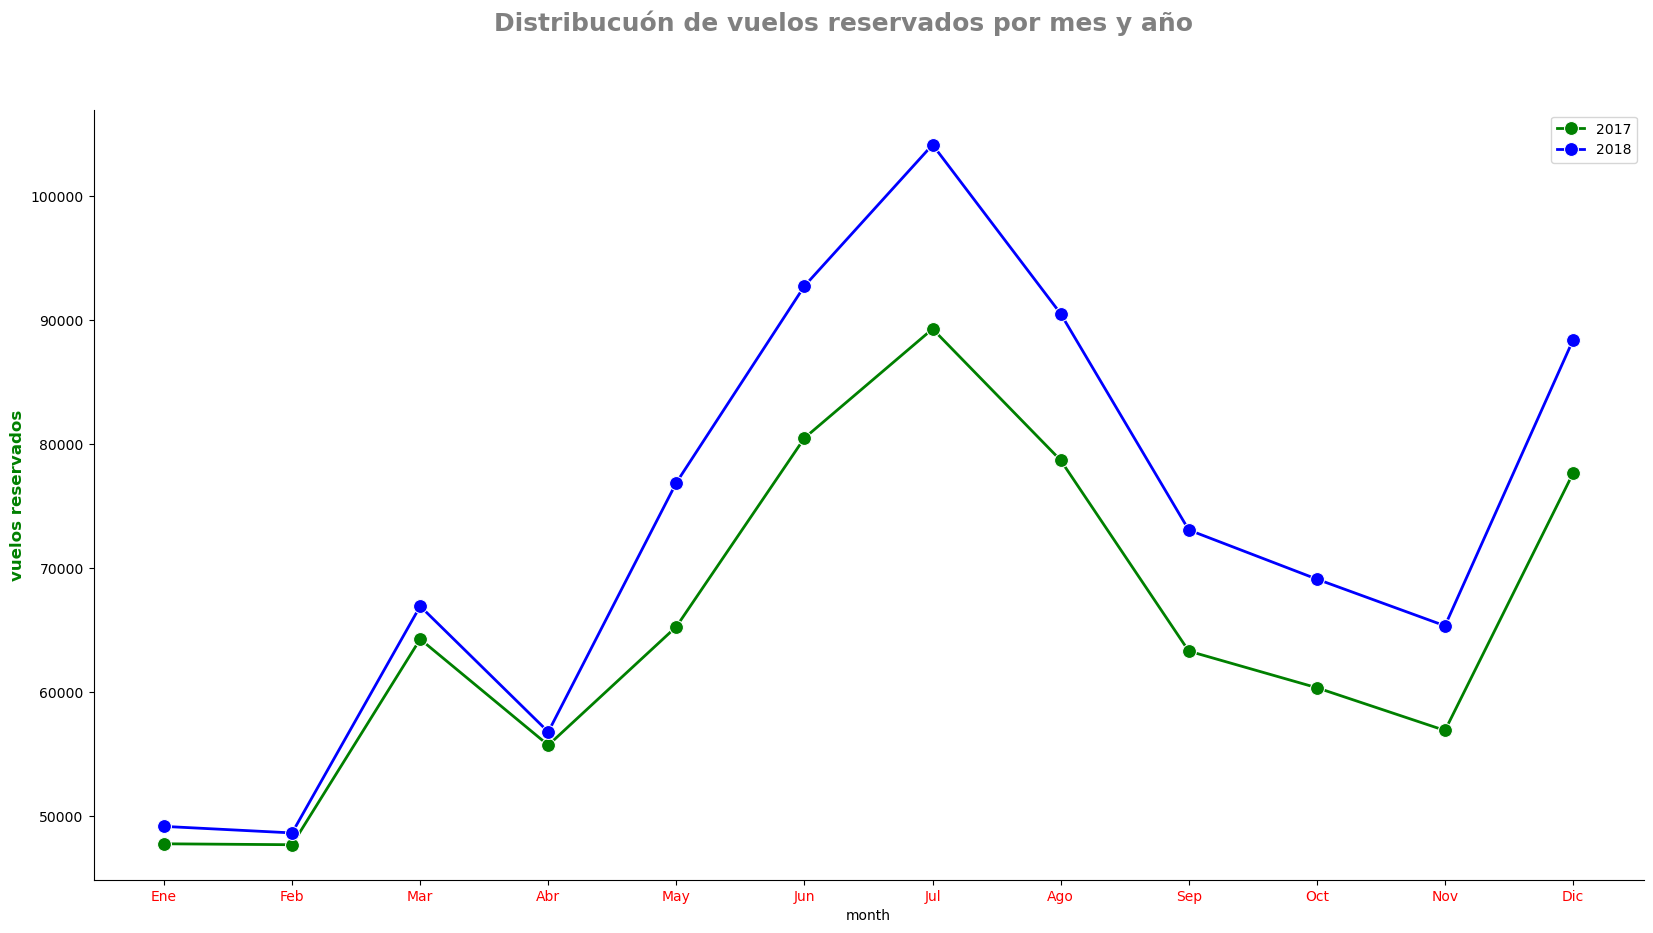

In [171]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,  figsize = (20, 10))
sns.lineplot(x=df_2017['month'], y=df_2017['flights_booked'], 
            color = "green", # color de la linea
            ax = ax, 
            marker = "o", # para especificar que marcador queremos
            markersize = 10, # para establecer el tamaño del marcador
            linewidth = 2, # para cambiar el grosor de la linea
            label='2017')

sns.lineplot(x=df_2018['month'], y=df_2018['flights_booked'], 
            color = "blue", # color de la linea
            ax = ax, 
            marker = "o", # para especificar que marcador queremos
            markersize = 10, # para establecer el tamaño del marcador
            linewidth = 2, # para cambiar el grosor de la linea
            label='2018')


# para el título de todas las gráficas
fig.suptitle('Distribucuón de vuelos reservados por mes y año', color = "grey", fontweight='bold', fontsize = 18)


# para cambiar las etiquetas del eje x y sus colores y tamaños
ax.set_xticks(df_2017["month"],  # valores originales del eje x
            ['Ene', "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"] , color = "red", fontsize = 10); # valores nuevos que queremos en el eje x




# para cambiar el nobre el eje y
ax.set_ylabel('vuelos reservados', color = "green", fontweight = "bold", fontsize = 12)



# para quitar los ejes de arriba y de la derecha         
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)        





### Interpretación de la gráfica
Se ve la misma distribución de vuelos resrvados en ambos años por lo que podemos suponer que es la norma aunque las cantidades puedan variar. Los primeros meses del año se reservan pocos vuelos (podría deberse a la cuesta de enero o un descanso tras las navidades). Durante el año hay 3 picos en los que sube la reseva de vuelos en marzo  julio y diciembre siendo la de julio la más alta con mucha diferencia (empieza a crecer desde abril llegando al pico en julio para bajar tras este). Los picos coinciden con fechas destacadas por las vacaciones, el de marzo, que no es un pico demasiado alto con las vacaciones de primavera, el de julio con el verano y el de diciembre (bastante alto también) con las navidades.

## 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

In [180]:
df_completo.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'province', 'city', 'postal_code', 'gender', 'education', 'salary',
       'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')

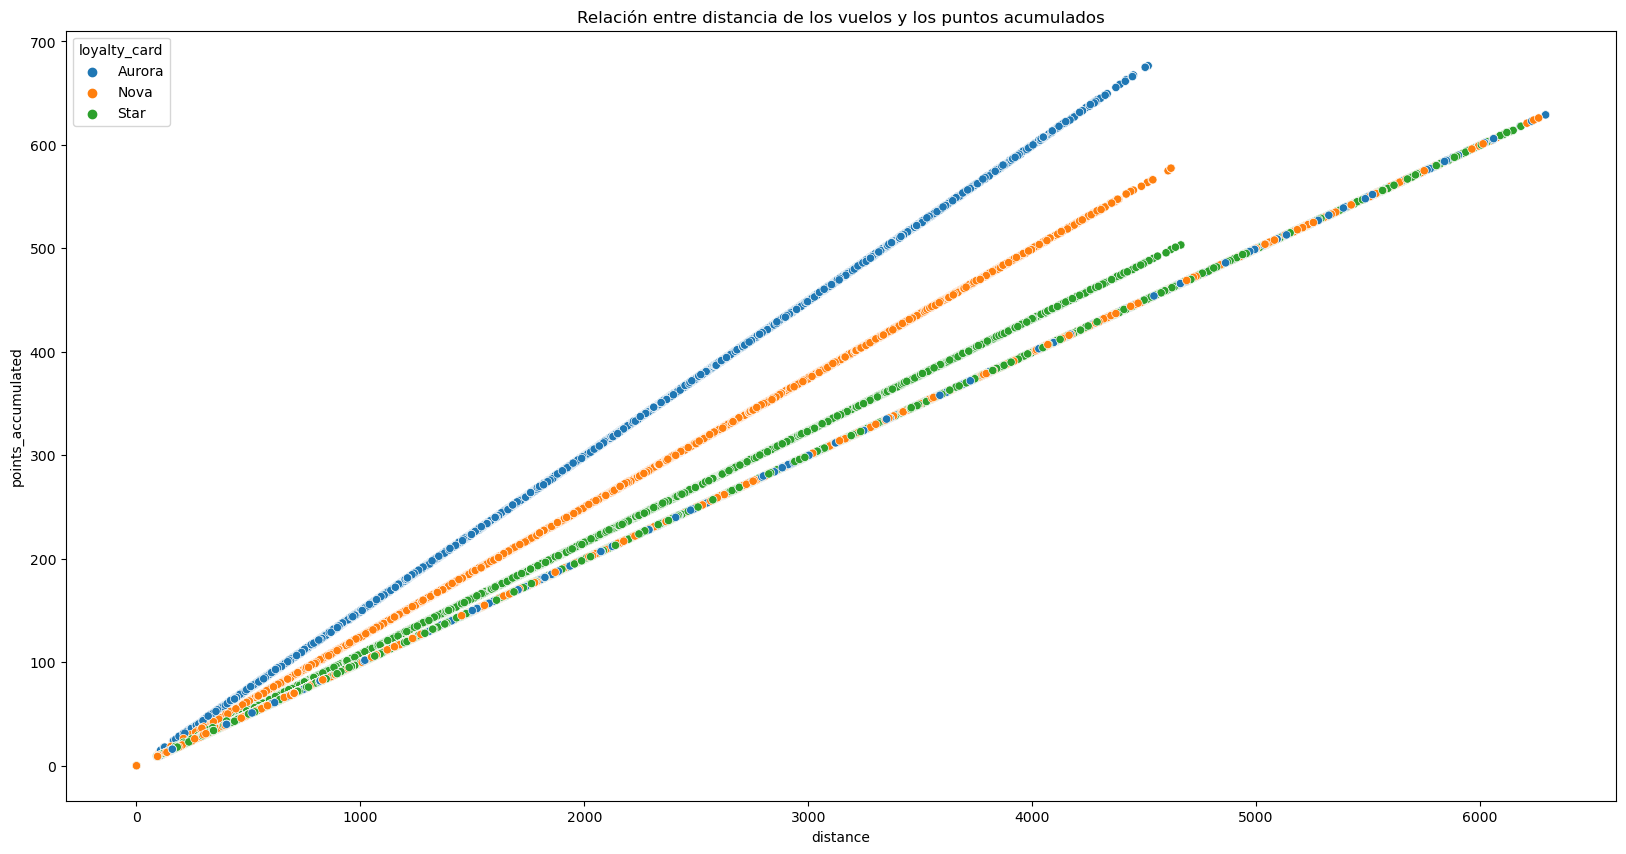

In [190]:
plt.figure(figsize=(20,10))
sns.scatterplot(data = df_completo, x = "distance", y = "points_accumulated", hue = 'loyalty_card')
plt.title("Relación entre distancia de los vuelos y los puntos acumulados");

### Interpretación de la gráfica
Hay una relación clara en la que a mayor distancia, mayor es la cantidad de puntos acumulado. Al ver que se forman 4 líneas muy definidas he pensado que debia haber alguna condicion establecida detrás de cada una de ellas y he confirmado que se trata de 'loyalty card' y que según el tipo la cantidad de puntos acumulados por la misma distancia es diferente.

## 3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [191]:
df_province = df_completo.groupby('province')['loyalty_number'].nunique().reset_index()

In [219]:
df_province = df_province.sort_values(by='loyalty_number', ascending=False)

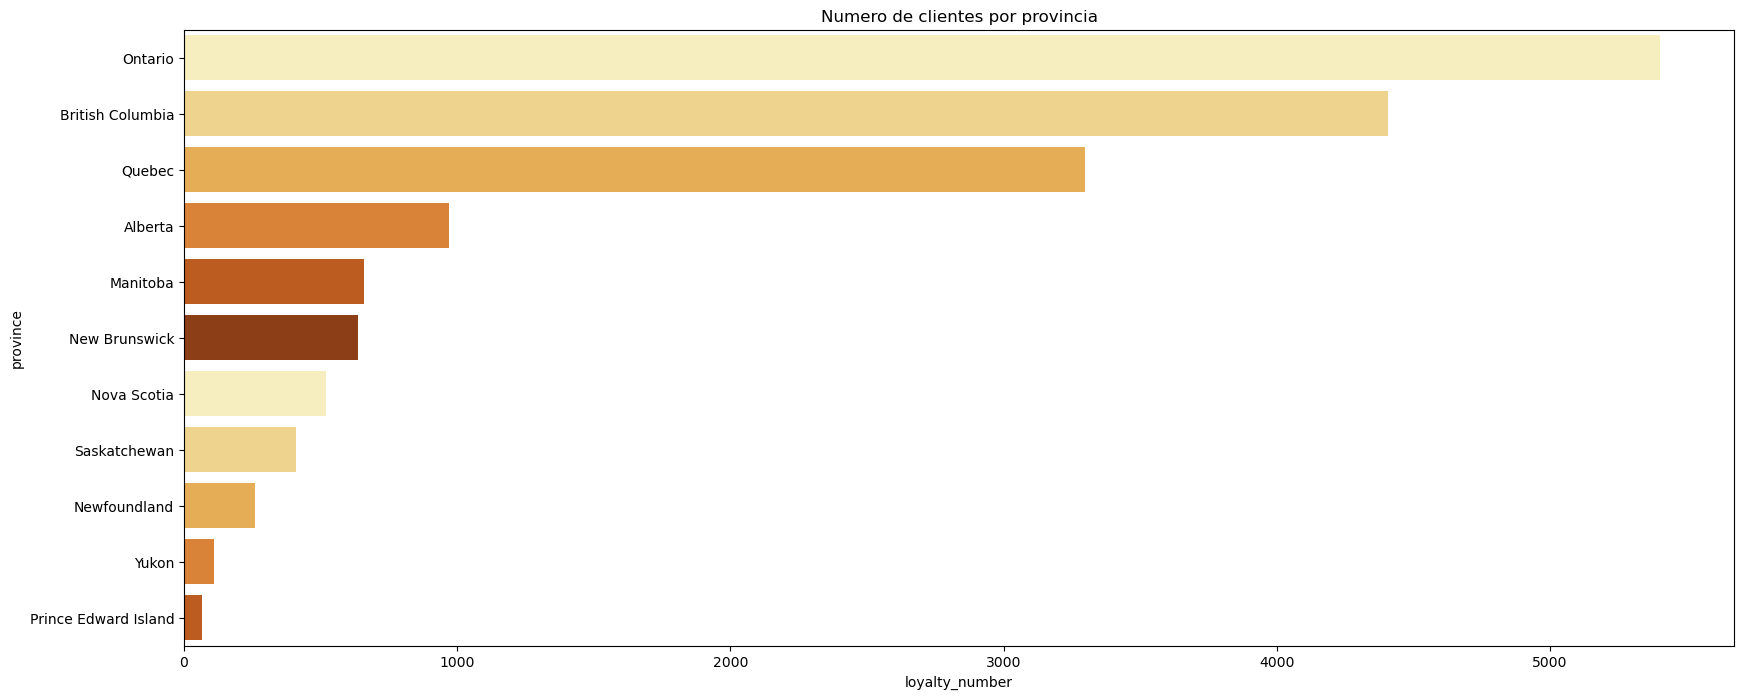

In [220]:
plt.figure(figsize =(20,8)) 
sns.barplot(data = df_province, x = "loyalty_number", y = "province", palette=sns.color_palette("YlOrBr")) 
plt.title("Numero de clientes por provincia");

### Interpretación de la gráfica
La mayoría de clientes se encuentran en los tres estados más poblados de Canada (Ontario, Quebec y Columbia Británica), destacando sobre todas Ontario que tiene de lejos la población más alta con casi 16 millones de habitantes, lo que tiene sentido. Llama la atención que Columbia Británica esté por encima de Quebec, eso sí, ya qye tiene mucha menor población.

## 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [201]:
df_completo.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'province', 'city', 'postal_code', 'gender', 'education', 'salary',
       'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')

In [206]:
#la columna salario tiene muchos nulos y al principio la hemos analizado un poco para ver que hacer en caso de querer imputarlos pero vamos a investigar un poco más teniendo en cuenta la relacion con la educacion
df_salario_nulo = df_completo[df_completo['salary'].isnull()][['education']]
df_salario_nulo['education'].value_counts()

education
College    102260
Name: count, dtype: int64

In [209]:
df_salario_notnulo = df_completo[df_completo['salary'].notnull()][['education']]
df_salario_notnulo['education'].value_counts()

education
Bachelor                252567
High School or Below     18915
Doctor                   17731
Master                   12287
Name: count, dtype: int64

In [ ]:
#He descubierto que todos los valores nulos de salario corresponden a una única categoria de educacion 'college' y que dicha categoría no aparece en ningún registro cuyo salario conozcamos.
#he decidido no imputar los nulos y no analizar el salario de la categoria de educacion 'college' ya que sería muy poco fiable al no tener ningún valor real.

In [213]:
#los clientes están duplicados así que solo cogeré el último de los registros de cada duplicado suponiendo que es el más actual
df_salary = df_completo[df_completo['salary'].notnull() & df_completo['loyalty_number'].duplicated(keep='last')][['salary', 'education']]
df_salary


,salary,education
0,92552.0,Bachelor
3,63253.0,Bachelor
4,91163.0,Bachelor
5,70323.0,Bachelor
6,76849.0,Bachelor
...,...,...
403727,75616.0,Bachelor
403739,75616.0,Bachelor
403743,75616.0,Bachelor
403751,75616.0,Bachelor


In [222]:
df_salary_group = df_salary.groupby('education')['salary'].mean().reset_index().sort_values(by='salary', ascending=False) #creo que sería más adecuado hacerlo con la mediana pero ele ejercicio especifica que hay que analizar el promedio


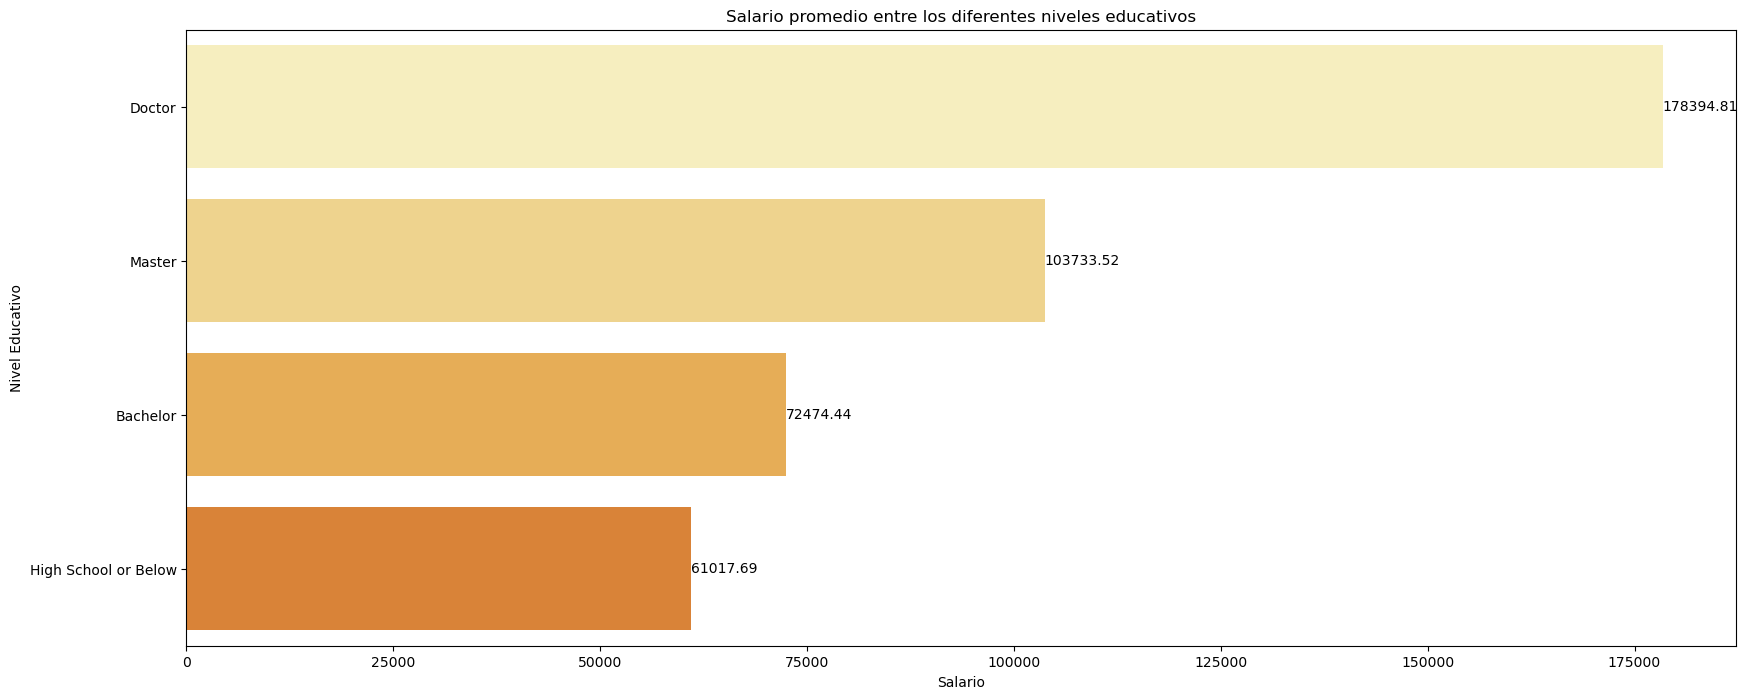

In [231]:
plt.figure(figsize =(20,8)) 
sns.barplot(data = df_salary_group, x = 'salary', y = 'education',palette=sns.color_palette("YlOrBr"))
plt.title("Salario promedio entre los diferentes niveles educativos")
plt.xlabel("Salario")
plt.ylabel("Nivel Educativo")
for i, valor in enumerate(df_salary_group['salary']):
    plt.text(valor, i, str(round(valor, 2)), ha='left', va='center');

### Interpretación de la gráfica
A mayor nivel educativo mayor es el promedio del salario. Siguiendo esta teoría podemos suponer que la columna de 'college', que no hemos podido analizar ya que no tenemos ningún dato, debería estar entre Bachelor y Master y, por lo tanto, tener un salario medio entre 72474.44 y 103733.52 pero no creo que tengamos la suficiente seguridad para afirmarlo.

## 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

## 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

# Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo
Objetivo del Ejercicio: Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos
reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:
## 1. Preparación de Datos:
Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.


## 2. Análisis Descriptivo:
Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del
número de vuelos reservados para cada grupo.


## 3. Prueba Estadística:
Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes
niveles educativos.